In [46]:
# Step 1: Load the dataset
import pandas as pd
import numpy as np

data = pd.read_csv("bostonHousing.csv")
print(data.head())
print(data.columns)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


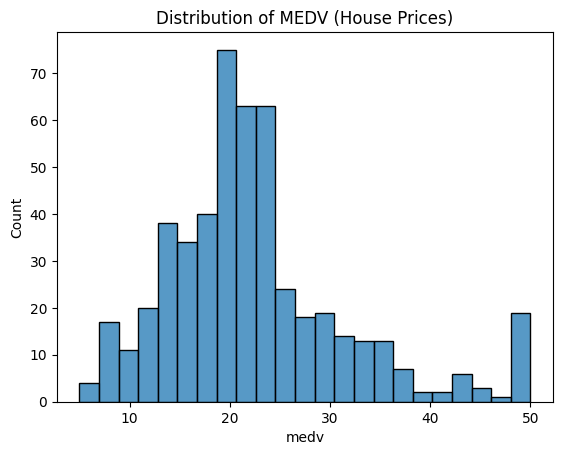

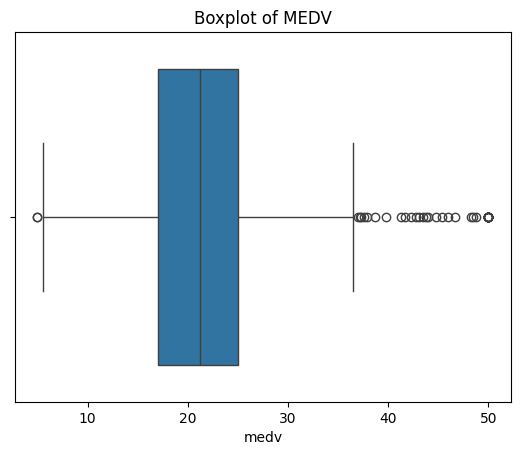

Missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [47]:
# Step 2: Preprocess the dataset
# EDA - optional but good practice
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["medv"])
plt.title("Distribution of MEDV (House Prices)")
plt.show()

sns.boxplot(x=data["medv"])
plt.title("Boxplot of MEDV")
plt.show()

# Handling missing values
print("Missing values:\n", data.isnull().sum())

# Separate features and target
X = data.drop('medv', axis=1)   #all column except medv is stored in x
y = data['medv']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  #convert numeric data to have mean=0 and sd=1

In [53]:
# Step 3: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
#x_train.shape show no of R & C  in i/n data
#y_train.shape shoe no of R in o/p data
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13)
Testing set shape: (152, 13) (152,)


In [49]:
# Step 4: Define the model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()  #layers r stacked one after another
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) #input layer
model.add(Dense(64, activation='relu')) #hidden layer 1
model.add(Dense(32, activation='relu'))  #hidden layer 2
model.add(Dense(16, activation='relu')) #hidden layer 3
model.add(Dense(1))  # Output layer

print(model.summary())

C:\python37\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 602.7733 - mae: 22.6483 - val_loss: 582.4466 - val_mae: 22.6448
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 573.5735 - mae: 22.2547 - val_loss: 576.4235 - val_mae: 22.5115
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 609.5464 - mae: 22.8885 - val_loss: 568.0851 - val_mae: 22.3255
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 601.3845 - mae: 22.5536 - val_loss: 556.1243 - val_mae: 22.0560
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 596.5566 - mae: 22.5015 - val_loss: 538.7614 - val_mae: 21.6588
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 555.8297 - mae: 21.5386 - val_loss: 513.6520 - val_mae: 21.0712
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 532.1014 - mae: 21.0644 - val_loss: 478.6849 - val_mae: 20.2244
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 481.1657 - mae: 19.5886 - val_loss: 431.9389 - val_mae: 19.0337
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

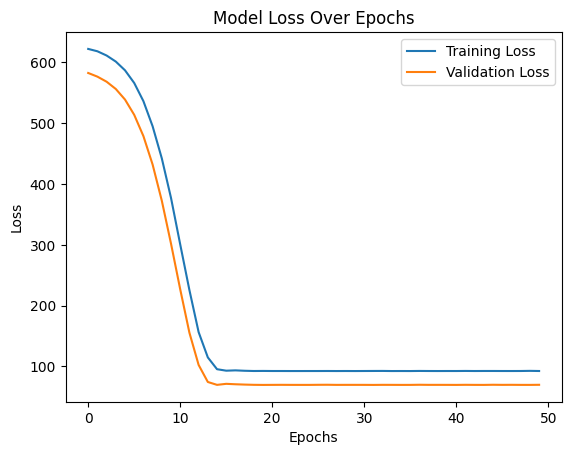

In [51]:
# Step 6: Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#An epoch refers to one complete cycle through the entire training dataset during the training process of a machine learning model.

In [52]:
# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.7929 - mae: 6.3574
Mean Absolute Error on Test Set: 6.604160308837891
